# Download YOLOv6-v3.0 Repo & Install Dependencies

In [4]:
!git clone https://github.com/meituan/YOLOv6.git

fatal: destination path 'YOLOv6' already exists and is not an empty directory.


In [5]:
!pip install -r /content/YOLOv6/requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/YOLOv6/requirements.txt'

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Download Roboflow Dataset

In [6]:
%cd YOLOv6

/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/yolov6


Make sure that yolov6 repo is the currently opened directory.

e.g. the given path ends with ../yolov6

In [7]:
%pwd

'/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/yolov6'

In [8]:
%ls

__init__.py  assigners/   data/        models/      utils/
__pycache__/ core/        layers/      solver/


In [9]:
# !pip install roboflow

from roboflow import Roboflow

In [10]:
dataset = 0
# 0: Clean Carts
# 1: Clean Products
# 2: Carts
# 3: Products

if dataset == 0:
    rf = Roboflow(api_key="LJUCaZNr0dTRM9oEmTsC")
    project = rf.workspace("new-workspace-l2a1a").project("trolley-rrisa")
    dataset = project.version(2).download("mt-yolov6")
elif dataset == 1:
    rf = Roboflow(api_key="LJUCaZNr0dTRM9oEmTsC")
    project = rf.workspace("leon-spiess").project("smartbasket")
    dataset = project.version(3).download("mt-yolov6")
elif dataset == 2:
    rf = Roboflow(api_key="LJUCaZNr0dTRM9oEmTsC")
    project = rf.workspace("mario-cuezzo-w9ofb").project("carritos-kbhw5")
    dataset = project.version(2).download("mt-yolov6")
elif dataset == 3:
    rf = Roboflow(api_key="LJUCaZNr0dTRM9oEmTsC")
    project = rf.workspace("ezycart").project("ezycart-nbumi")
    dataset = project.version(1).download("mt-yolov6")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to trolley-2 in mt-yolov6:: 100%|██████████| 1175/1175 [00:00<00:00, 7460.70it/s]


# Training

## Setup Training

### Config Benchmarking
![image.png](attachment:image.png)

In [42]:
# path_to_best_config = "/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/configs/yolov6n6_finetune.py" # "/content/YOLOv6/configs/yolov6l6_finetune.py"
# path_to_best_config = "/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/configs/yolov6s6_finetune.py"
path_to_best_config = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/configs/yolov6m_finetune.py' # adjusted for size 640
# path_to_dataset = "/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/trolley-2/data.yaml" # "/content/YOLOv6/EzyCart-1/data.yaml"
path_to_dataset = '/Users/johannes/Code/labelstudio/NanoStore_Small_YOLO_splitted_v6/data.yaml'
# path_to_dataset = '/Users/johannes/Code/labelstudio/NanoStore_Large_YOLO_splitted_v6/data.yaml' # NanoStore Large (total: 450 images)

In [12]:
# conf: select config file to specify network/optimizer/hyperparameters. We recommend to apply
# yolov6n/s/m/l_finetune.py
# when training on your custom dataset.

# P5 models
# python tools/train.py --batch 32 --conf configs/yolov6s_finetune.py --data data/dataset.yaml --fuse_ab --device 0
# P6 models
# python tools/train.py --batch 32 --conf configs/yolov6s6_finetune.py --data data/dataset.yaml --img 1280 --device 0

## Start Training

### Pre-trained weights Benchmarking (size 640 = p5 models, 1280 = p6 models)
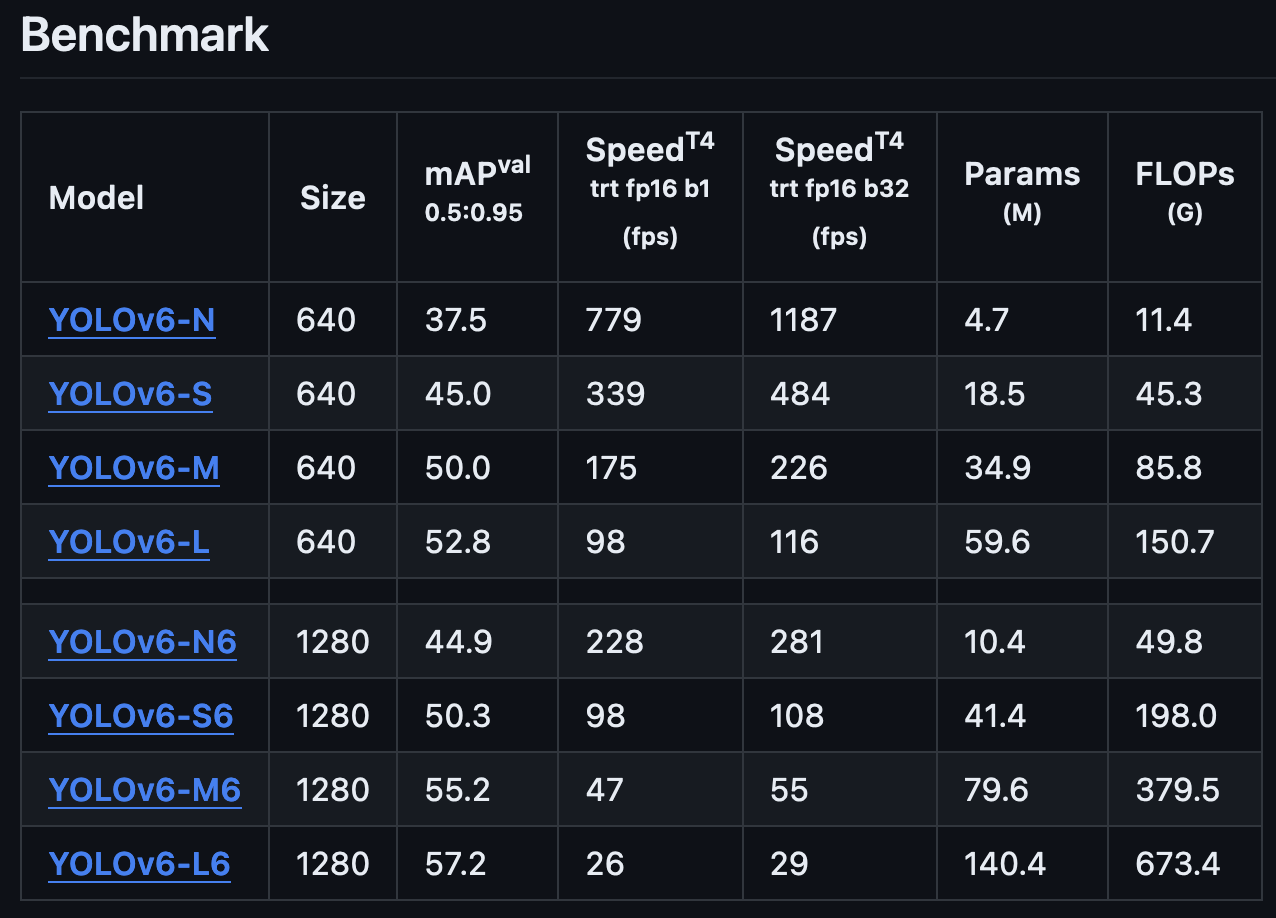

In [4]:
%cd YOLOv6

/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6


/Users/johannes/.pyenv/versions/3.11.7/envs/yolov6/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [44]:
!python tools/train.py --batch 16 --conf {path_to_best_config} --data {path_to_dataset} --epochs 50 --device cpu --fuse_ab

Using CPU for training... 
training args are: Namespace(data_path='/Users/johannes/Code/labelstudio/NanoStore_Small_YOLO_splitted_v6/data.yaml', conf_file='/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/configs/yolov6m_finetune.py', img_size=640, rect=False, batch_size=16, epochs=50, workers=8, device='cpu', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, fuse_ab=True, bs_per_gpu=32, specific_shape=False, height=None, width=None, cache_ram=False, rank=-1, world_size=1, save_dir='runs/train/exp23')

Loading state_dict from weights/yolov6m.pt for fine-tuning...
Model: Model(
  (backbone): CSPBepBackbone(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(i

### If training process was corrupted -> continue last training

In [3]:
!python tools/train.py --resume

Resume training from the checkpoint file :./runs/train/exp16/weights/last_ckpt.pt
Using CPU for training... 
training args are: Namespace(data_path='/Users/johannes/Code/YOLO/YOLOv6-v3.0/nanostore-small/data.yaml', conf_file='/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/configs/yolov6s6_finetune.py', img_size=640, rect=False, batch_size=16, epochs=100, workers=8, device='cpu', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume='./runs/train/exp16/weights/last_ckpt.pt', write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, fuse_ab=False, bs_per_gpu=32, specific_shape=False, height=None, width=None, cache_ram=False, rank=-1, world_size=1, save_dir='runs/train/exp16')

Loading state_dict from weights/yolov6s6.pt for fi

# Evaluate the model

In [47]:
# path_to_best_weights = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp16/weights/best_ckpt.pt'
path_to_best_weights = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp23/weights/last_ckpt.pt'

# exp11 (best model)
# path_to_best_weights = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp11/weights/best_ckpt.pt'

# exp11 (best model .onnx export)
# path_to_best_weights = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp11/weights/best_ckpt.onnx'

In [48]:
!python tools/eval.py --data {path_to_dataset}  --weights {path_to_best_weights} --task val --device cpu

Namespace(data='/Users/johannes/Code/labelstudio/NanoStore_Small_YOLO_splitted_v6/data.yaml', weights='/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp23/weights/last_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='cpu', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp23/weights/last_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 34.80M, Gflops: 85.63
img record infomation path is:/Users/johannes/Code/labelstudio/NanoStore_Small_YOLO_splitted_v6/images/.valid_cache.json
Val: Checking formats of labels with 8 process(es): 
7 label(s) found,

# Model inference (Pytorch Weights)

## Inference on entire folder & sinlge images

In [2]:
%cd YOLOv6
%ls

/Users/johannes/.pyenv/versions/3.11.7/envs/yolov6/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6
Carritos-2/       configs/          inference.ipynb   weights/
LICENSE           data/             requirements.txt  yolov6/
README.md         deploy/           runs/             yolov6s.pt
README_cn.md      docs/             tools/            {output_folder}/
assets/           hubconf.py        tutorial.ipynb


In [3]:
from tools import infer
import os

In [10]:
# input_folder = "/Users/johannes/Code/Work/Exports/Random_Test"
input_folder = "/Users/johannes/Code/Work/Test_Data" 
# input_folder = '/Users/johannes/Code/Work/Exports/Out-of-sample-Test' # Out-of-Sample-Data
# OR
input_image = "/Users/johannes/Desktop/Bildschirmfoto 2024-02-22 um 15.59.54.png"

output_folder = "/Users/johannes/Code/YOLO/YOLOv6-v3.0/inference_output"
path_to_best_model = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp18/weights/last_ckpt.pt'

os.makedirs(output_folder, exist_ok=True)
infer.run(weights=path_to_best_model, source=input_folder, yaml='/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/data/coco.yaml', device='cpu', conf_thres=0.5, save_dir=output_folder, view_img=False)
print("Finished evaluation")

Save directory already existed
Loading checkpoint from /Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp18/weights/last_ckpt.pt

Fusing model...
Switch model to deploy modality.
100%|██████████| 84/84 [02:08<00:00,  1.53s/it]
Results saved to /Users/johannes/Code/YOLO/YOLOv6-v3.0/inference_output


Finished evaluation


## Inference on entire Folder (terminal)

In [6]:
import os
from glob import glob

In [16]:
# Define input and output folders
input_folder = "/Users/johannes/Code/Work/Exports/Random_Test"
# input_folder = '/Users/johannes/Code/Work/Exports/Out-of-sample-Test'
output_folder = "/Users/johannes/Code/YOLO/YOLOv6-v3.0/inference_output"
path_to_best_model = '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp18/weights/last_ckpt.pt'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define supported image extensions
image_extensions = ["*.png", "*.jpg", "*.jpeg"]

# Find all image files
image_paths = []
for extension in image_extensions:
    image_paths.extend(glob(os.path.join(input_folder, extension)))

# Process each image
for image_path in image_paths: # --project
    !python tools/infer.py --weights {path_to_best_model} --source {image_path} --device cpu --conf-thres=0.65 --save-dir {output_folder}
    print(f"Processed image: {image_path}")

print("Finished processing all images.")

Namespace(weights='/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp23/weights/last_ckpt.pt', source='/Users/johannes/Code/Work/Exports/Random_Test/173_0_60.png', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.05, iou_thres=0.45, max_det=1000, device='cpu', save_txt=False, not_save_img=False, save_dir='/Users/johannes/Code/YOLO/YOLOv6-v3.0/inference_output', view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp23/weights/last_ckpt.pt

Fusing model...
Switch model to deploy modality.
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]
Results saved to /Users/johannes/Code/YOLO/YOLOv6-v3.0/inference_output
Processed image: /Users/johannes/Code/Work/Exports/Random_Test/173_0_60.png
Namespace(weights='/Users/johannes/

UnboundLocalError: cannot access local variable 'child' where it is not associated with a value

# Live Inference (e.g. local camera or web camera)

In [ ]:
# P5 models
!python tools/infer.py --weights yolov6s.pt --webcam --webcam-addr 0
# P6 models
!python tools/infer.py --weights yolov6s6.pt --img 1280 1280 --webcam --webcam-addr 0

# Export model to .onnx

In [14]:
# Without NMS OP, pure model.
!python deploy/ONNX/export_onnx.py --weights {"/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp18/weights/best_ckpt.pt"} # --simplify # --device 0
# If you want to run with ONNX-Runtime (NMS integrated).
# !python deploy/ONNX/export_onnx.py --weights path_to_best_weights --simplify --device 0 --dynamic-batch --end2end --ort
# If you want to run with TensorRT (NMS integrated).
# !python deploy/ONNX/export_onnx.py --weights path_to_best_weights --simplify --device 0 --dynamic-batch --end2end

Namespace(weights='/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp18/weights/last_ckpt.pt', img_size=[640, 640], batch_size=1, half=False, inplace=False, simplify=False, dynamic_batch=False, end2end=False, trt_version=8, ort=False, with_preprocess=False, topk_all=100, iou_thres=0.65, conf_thres=0.5, device='0')
Loading checkpoint from /Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/runs/train/exp18/weights/last_ckpt.pt

Fusing model...
Model(
  (backbone): CSPBepBackbone(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)
      (se): Identity()
      (rbr_reparam): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (ERBlock_2): Sequential(
      (0): RepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (rbr_reparam): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
      (1): BepC3(
        (cv1): ConvBNReLU(
          (block): ConvModule(
            (conv): Conv2d(96, 64, kern